In [11]:
import pandas as pd
import numpy as np
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=names)

# Rename the variables in the model to match the column names in the data
model = BayesianModel([('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'), ('exang', 'trestbps'), ('trestbps', 'chol'), ('chol', 'target')])

# Fit the model using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Print the edges and CPDs of the model
for cpd in model.get_cpds():
    print(cpd)
print(model.edges())


+-----------+------------+
| age(29.0) | 0.00330033 |
+-----------+------------+
| age(34.0) | 0.00660066 |
+-----------+------------+
| age(35.0) | 0.0132013  |
+-----------+------------+
| age(37.0) | 0.00660066 |
+-----------+------------+
| age(38.0) | 0.00660066 |
+-----------+------------+
| age(39.0) | 0.0132013  |
+-----------+------------+
| age(40.0) | 0.00990099 |
+-----------+------------+
| age(41.0) | 0.0330033  |
+-----------+------------+
| age(42.0) | 0.0264026  |
+-----------+------------+
| age(43.0) | 0.0264026  |
+-----------+------------+
| age(44.0) | 0.0363036  |
+-----------+------------+
| age(45.0) | 0.0264026  |
+-----------+------------+
| age(46.0) | 0.0231023  |
+-----------+------------+
| age(47.0) | 0.0165017  |
+-----------+------------+
| age(48.0) | 0.0231023  |
+-----------+------------+
| age(49.0) | 0.0165017  |
+-----------+------------+
| age(50.0) | 0.0231023  |
+-----------+------------+
| age(51.0) | 0.039604   |
+-----------+------------+
|

C:\Users\kannu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


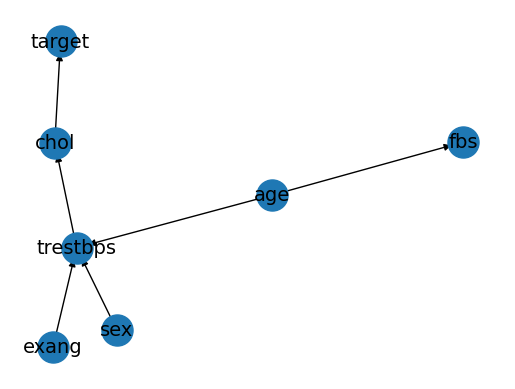

In [12]:
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(model.nodes)

# Add edges to the graph
for edge in model.edges:
    G.add_edge(*edge)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif")
nx.draw_networkx_edges(G, pos, edgelist=G.edges, arrows=True)

# Show the graph
plt.axis("off")
plt.show()
